In [1]:
%matplotlib inline

# step1. 탐색
## 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drinks = pd.read_csv('../data/Drinks/drinks.csv')
print(drinks.shape)
drinks.head()

(193, 6)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [7]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

# step2. 인사이트의 발견
## 탐색과 시각화
***
### [피쳐간의 상관관계 탐색]

In [8]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']

In [9]:
corr = drinks[cols].corr(method="pearson")
# 상관관계를 보기(상관관계에는 object타입은 연결할 수 없다.)
# 그래서 사용할 컬럼만 데이터 프레임에서 뽑아서 사용
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


### 위의 결과로 얻을 수 있는 인사이트
bear_servings : 나라별 맥주 소비량<br/>
spirit_servings : 나라별 증류주 소비량<br/>
wine_servings : 나라별 와인 소비량<br/>
total_litres_of_pure_alcohol : 나라별 전체 알콜 소비량<br/>

1. 맥주의 소비량이 총 알콜 소비량과 상관이 높았다.
2. 와인을 많이 마시는 사람이 반드시 맥주를 많이 소비하는것은 아니다 (하지만 어느정도는 마시고있기는함)
3. spirit은 와인보다는 맥주와 더 상관이 있다.

***
### 항목간 상관관계를 알 수 있는 방법 3가지
1. corr 함수를 이용(피어슨)
2. heap 그래프
3. pairplot 그래프

In [10]:
cols_view = ['beer', 'spirit', 'wine','alcohol']

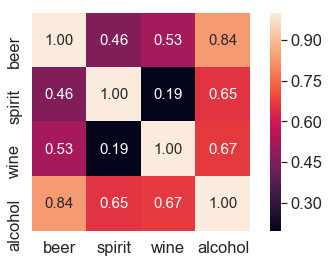

In [11]:
# corr 행렬 히트맵을 시각화합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view
    )

plt.tight_layout()
plt.show()

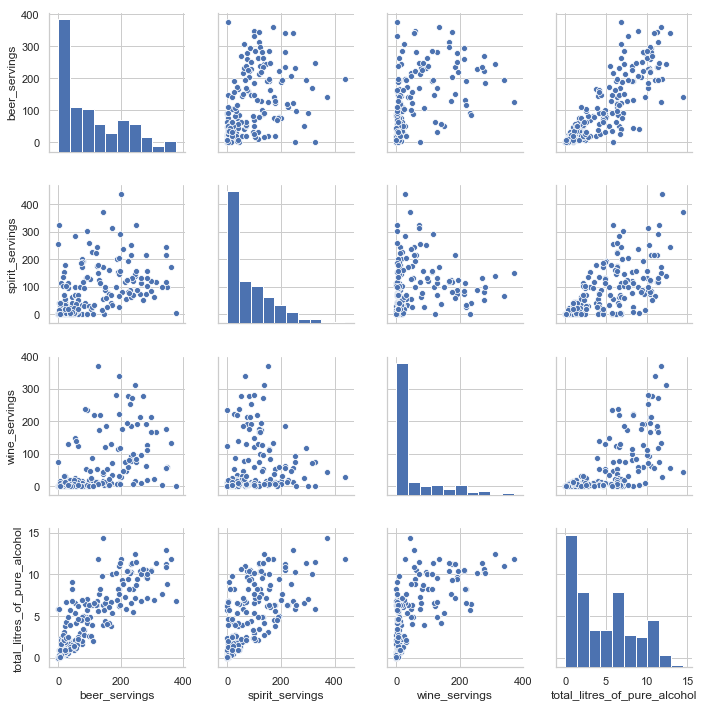

In [12]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[cols], height=2.5)
plt.show()

# step3. 탐색적 분석
## 스무고개로 분석하는 개념적 탐색
***
### 전처리

info() 함수를 이용해서 결측 데이터 확인

In [13]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

NA(not Available): 결측치(+이상치)를 모두 NA처리를 함.  
NA로 모두 변경한 것을 일괄 처리 할 수 있다.

In [14]:
drinks[drinks['continent'].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [15]:
# 결측 데이터를 처리해주어야한다. 기타라는 의미로 Other의 OT로 설정
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


### 기술(설명)적 통계
간단한 통계를 통해서 데이터들을 자세하게 설명하자

In [16]:
# value_count() : 그룹별 count
con_val_count = drinks['continent'].value_counts()
con_val_count

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [17]:
type(con_val_count)

pandas.core.series.Series

In [18]:
# 시리즈는 index + values 이다.

In [19]:
con_val_count.index

Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

In [20]:
con_val_count.values

array([53, 45, 44, 23, 16, 12], dtype=int64)

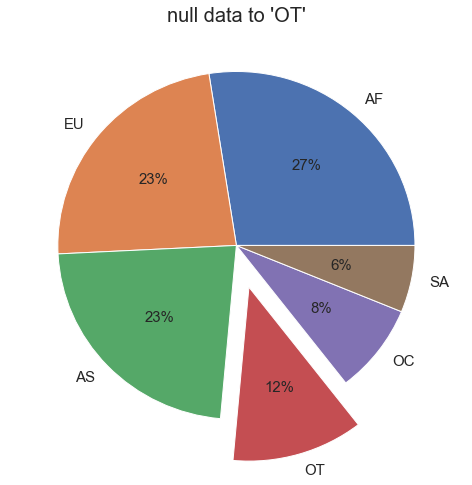

In [21]:
plt.figure(figsize=(8,8))
labels = con_val_count.index.tolist()
fracs1 = con_val_count.values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)
f_size = {"fontsize":15}

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', textprops=f_size)
plt.title('null data to \'OT\'', fontsize=20)
plt.show()

### [그룹 단위의 데이터 분석: 대륙별 분석]
#### pply, agg 함수를 이용한 대륙별 분석

***
1. 대륙별 spirit_servings의 평균, 최소, 최대 합계를 계산
  
agg 는 묶어서라는 의미를 가지고 있다.

In [22]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
print(type(result))
result

<class 'pandas.core.frame.DataFrame'>


,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [23]:
result2 = drinks.groupby('continent').spirit_servings.mean()
print(type(result2))
result2

<class 'pandas.core.series.Series'>


continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [24]:
result3 = drinks.groupby('continent')['spirit_servings'].mean()
print(type(result3))
result3

<class 'pandas.core.series.Series'>


continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [25]:
result4 = result3[result3 >= 100]
result4

continent
EU    132.555556
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [26]:
result4.idxmax() # result4의 values 중에서 가장 max 한 값의 index를 리턴

'OT'

### 미니 quiz
1. 맥추 총 소비량이 제일 높은 대륙은?
2. 와인 최대 소비량이 제일 높은 대륙은?
3. 맥주 평균 소비량이 제일 높은 대륙은?

In [27]:
# 1.
beer_total = drinks.groupby('continent').beer_servings.sum().idxmax()
beer_total

'EU'

In [28]:
# 2.
wine_max = drinks.groupby('continent').wine_servings.max().idxmax()
wine_max

'EU'

In [29]:
# 3.
bear_mean_max = drinks.groupby('continent').beer_servings.mean().idxmax()
bear_mean_max

'EU'

### [ 분석 결과에 대한 시각화 ]

In [30]:
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


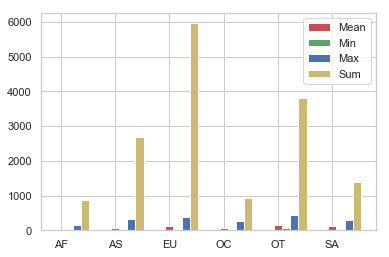

In [31]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.15
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects4 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

위에 증류수를 분석한 것 처럼 와인도 분석

In [32]:
wine_result = drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'sum'])
print(type(wine_result))
wine_result

<class 'pandas.core.frame.DataFrame'>


,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


In [33]:
wine_result2 = drinks.groupby('continent').wine_servings.mean()
print(type(wine_result2))
wine_result2

<class 'pandas.core.series.Series'>


continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [34]:
wine_result3 = drinks.groupby('continent')['wine_servings'].mean()
print(type(wine_result3))
wine_result3

<class 'pandas.core.series.Series'>


continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [35]:
wine_result4 = wine_result3[wine_result3 >= 100]
wine_result4

continent
EU    142.222222
Name: wine_servings, dtype: float64

In [36]:
wine_result4.idxmax()

'EU'

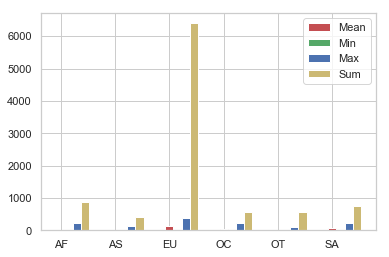

In [37]:
n_groups = len(wine_result.index)
means = wine_result['mean'].tolist()
mins = wine_result['min'].tolist()
maxs = wine_result['max'].tolist()
sums = wine_result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.15
 
rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
 
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, wine_result.index.tolist())
plt.legend()
plt.show()

### 미니 quiz2
1. 나라별 전체 알코올 소비량 대비 맥주 소비량을 구해보세요<br/>
    1) 1번 문제에 대해서 파생 변수를 생성해 출력
2. 전체 평균보다 많은 와인을 마시는 나라는 어디인가?
3. 전체 평균보다 많은 와인을 마시는 나라의 수는?
4. 전체 평균보다 많은 와인을 마시는 나라들의 평균은?

In [38]:
# 1.
drinks['total_drinks'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks['beer_rates'] = drinks['beer_servings']/drinks['total_drinks']
drinks[['country','beer_rates']].head(10)

,country,beer_rates
0,Afghanistan,NaN
1,Albania,0.323636
2,Algeria,0.641026
3,Andorra,0.352518
4,Angola,0.680251
5,Antigua & Barbuda,0.370909
6,Argentina,0.439636
7,Armenia,0.099526
8,Australia,0.478899
9,Austria,0.511927


In [39]:
# 2.
wine_mean = drinks['wine_servings'].mean()
wine_over_mean = drinks[drinks['wine_servings'] > wine_mean]
wine_over_mean['country'].values

array(['Albania', 'Andorra', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Belgium', 'Bulgaria', 'Canada', 'Chile',
       'Cook Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Laos', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Poland', 'Portugal', 'Romania', 'Russian Federation', 'St. Lucia',
       'Sao Tome & Principe', 'Serbia', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Macedonia', 'United Kingdom', 'USA', 'Uruguay'], dtype=object)

In [40]:
# 3. 그 나라의 수
len(wine_over_mean)

55

In [41]:
# 4. 평균 이상을 마시는 나라들의 평균
wine_over_mean_mean = wine_over_mean['wine_servings'].mean()
wine_over_mean_mean

154.27272727272728

In [42]:
# 5. 맥주 소비량 상위 15위까지 프린트
beer_sort = drinks.sort_values('beer_servings', ascending=False)
beer_sort_top15 = beer_sort.head(15)
beer_sort_top15

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_drinks,beer_rates
117,Namibia,376,3,1,6.8,AF,380,0.989474
45,Czech Republic,361,170,134,11.8,EU,665,0.542857
62,Gabon,347,98,59,8.9,AF,504,0.688492
65,Germany,346,117,175,11.3,EU,638,0.542320
98,Lithuania,343,244,56,12.9,EU,643,0.533437
135,Poland,343,215,56,10.9,EU,614,0.558632
188,Venezuela,333,100,3,7.7,SA,436,0.763761
81,Ireland,313,118,165,11.4,EU,596,0.525168
129,Palau,306,63,23,6.9,OC,392,0.780612
140,Romania,297,122,167,10.4,EU,586,0.506826


In [43]:
# 6. 한국이 있는지 확인
beer_sort_top15[beer_sort_top15['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_drinks,beer_rates


In [44]:
beer_sort[beer_sort['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_drinks,beer_rates
138,South Korea,140,16,9,9.8,AS,165,0.848485


In [45]:
beer_sort[beer_sort['beer_servings'] == 140]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_drinks,beer_rates
138,South Korea,140,16,9,9.8,AS,165,0.848485


In [46]:
beer_over140 = beer_sort[beer_sort['beer_servings'] >= 140]
len(beer_over140)

66

In [62]:
wine_sort = drinks.sort_values('wine_servings', ascending=False)
wine_kor_rank = wine_sort[wine_sort['wine_servings']>=9]
len(wine_kor_rank)

96

In [47]:
beer_sort[['country','beer_servings']].rank(method='max')

,country,beer_servings
117,119.0,193.0
45,46.0,192.0
62,62.0,191.0
65,65.0,190.0
98,98.0,189.0
135,138.0,189.0
188,189.0,187.0
81,81.0,186.0
129,132.0,185.0
140,141.0,184.0


In [48]:
beer_sort_asia = beer_sort[beer_sort['continent'] == 'AS']
beer_sort_asia

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_drinks,beer_rates
141,Russian Federation,247,326,73,11.5,AS,646,0.382353
138,South Korea,140,16,9,9.8,AS,165,0.848485
87,Kazakhstan,124,246,12,6.8,AS,382,0.324607
189,Vietnam,111,2,1,2.0,AS,114,0.973684
169,Thailand,99,258,1,6.4,AS,358,0.276536
36,China,79,192,8,5.0,AS,279,0.283154
85,Japan,77,202,16,7.0,AS,295,0.261017
112,Mongolia,77,189,8,4.9,AS,274,0.281022
134,Philippines,71,186,1,4.6,AS,258,0.275194
82,Israel,63,69,9,2.5,AS,141,0.446809


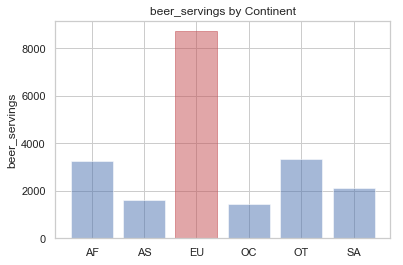

In [49]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

In [50]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


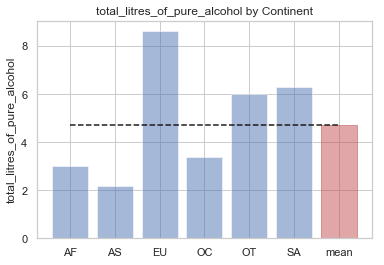

In [51]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

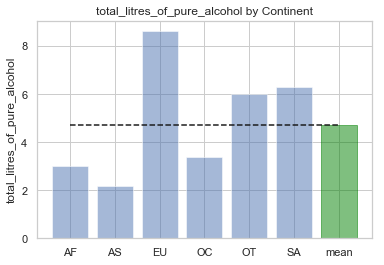

In [52]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

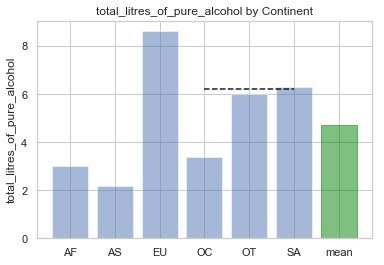

In [53]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [54]:
!pip install scipy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [55]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

In [56]:
from scipy import stats

In [57]:
# stats -> statistics 통계학
stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

africa와 europe 간의 평균의 차이가 의미가 있다. 대립가설이 채택
대립가설: 아프리카 유럽간 평균의 차이가 있다
영가설: 아프리카 ,유럽간의 평균의 차이가 없다(가능성이 0.05미만일 경우)
pvalue = 가능성 지수. 낮을수록 대립가설이 채택된다.